<div class="alert alert-block alert-info">
    <b>Librerias</b></div>

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import re
import plotly.express as px 
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import friedmanchisquare
import pingouin as pg


%matplotlib inline
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
    <b>Import</b></div>

In [275]:
liga = pd.read_csv("C:\\Users\ASUSPC\\IT_academy\\\Tasca_M5\\Lligues europees UEFA.csv", sep=';', encoding='ISO-8859-1')

In [276]:
#Entorno de trabajo
# ==================

print(os.getcwd())

C:\Users\ASUSPC\IT_academy\Tasca_M5


In [277]:
os.listdir(os.curdir)

['.ipynb_checkpoints',
 'heatmap.png',
 'Lligues europees UEFA.csv',
 'resumen.txt',
 'seleccion_tecnica_pruebas-1-1024x611-1.png',
 'tasca_5 primera prueba.ipynb',
 'Tasca_M5_T01.ipynb']

<div class="alert alert-block alert-info">
    <b>Examen datos</b></div>

In [278]:
liga.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


##### Resumen columnas

- Rk - Rank
- Squad - Team Name
- Country - Name of the Country
- LgRk - Squad Finish In Competition
- MP - Matches Played
- W - Wins
- D - Draws 
- L - Losses
- GF - Goals For
- GA - Goals Against
- GD - Goal Difference
- Pts - Points (3 for a Win and 1 for a Draw)
- Pts/G - Points per Game
- xG - Expected Goals inclusive of penalty kicks (not inclusive of penalty shootouts until noticed)
- xGA - Expected Goals Allowed (not inclusive of penalty shootouts until noticed)
- xGD - Expected Goal Difference (not inclusive of penalty shootouts until noticed)
- xGD/90 - Expected Goal Difference per 90 minutes (not inclusive of penalty shootouts until noticed)
- Last 5 - Last 5 matches ordered chronologically from left to right
- Attendance - Attendance per game during the season, only for home matches
- Top Team Scorer - Inclusive of only League matches during that season
- Goalkeeper - Goalkeeper with the most minutes in the league play

In [279]:
liga.shape

(98, 21)

In [280]:
liga.ndim

2

In [281]:
liga.columns.unique()

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

In [282]:
liga.Squad.unique()

array(['Manchester City', 'Liverpool', 'Real Madrid', 'Bayern Munich',
       'Paris S-G', 'Milan', 'Inter', 'Napoli', 'Dortmund', 'Barcelona',
       'Chelsea', 'Juventus', 'Leverkusen', 'Monaco', 'Tottenham',
       'Marseille', 'Atlético Madrid', 'Arsenal', 'Sevilla', 'Rennes',
       'Betis', 'Lazio', 'RB Leipzig', 'Strasbourg', 'Nice',
       'Union Berlin', 'Real Sociedad', 'Lens', 'Fiorentina', 'Roma',
       'Freiburg', 'Atalanta', 'Lyon', 'Manchester Utd', 'Köln',
       'Villarreal', 'West Ham', 'Athletic Club', 'Nantes', 'Lille',
       'Hellas Verona', 'Wolves', 'Torino', 'Mainz 05', 'Sassuolo',
       'Hoffenheim', 'Leicester City', "M'Gladbach", 'Brighton', 'Brest',
       'Osasuna', 'Crystal Palace', 'Celta Vigo', 'Reims',
       'Eint Frankfurt', 'Brentford', 'Wolfsburg', 'Bochum',
       'Aston Villa', 'Valencia', 'Udinese', 'Newcastle Utd',
       'Montpellier', 'Bologna', 'Rayo Vallecano', 'Augsburg', 'Espanyol',
       'Southampton', 'Getafe', 'Elche', 'Angers', 'Em

In [283]:
liga.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/G              float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Last 5              object
Attendance           int64
Top Team Scorer     object
Goalkeeper          object
dtype: object

In [284]:
liga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [285]:
liga.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [286]:
liga.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [287]:
liga.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


<div class="alert alert-block alert-warning">
La columna "Top Team Scorer" contiene información referente a los jugadores con mas goles marcados por cada equipo en la season en examen.
Parece sensato extraer el dato y tenerlo disponible para posibles análisis.</div>

In [288]:
#Creo columna nueva con los goles y le asigno dtype int
# =======================================================================

liga['Goals'] = liga['Top Team Scorer'].str.extract(r'(\d+)')
liga['Goals'] = liga['Goals'].astype(int)

In [289]:
# Elimino el numero de la columna original
# =======================================================================

liga['Top Team Scorer'] = liga['Top Team Scorer'].str.replace(r'\s*\-\s*\d+', '', regex=True)

In [290]:
#Ordeno las columnas
# =======================================================================

liga = pd.DataFrame.reindex(liga, columns = ['Rk','Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goals', 'Goalkeeper'])

In [291]:
liga.columns.unique()

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goals', 'Goalkeeper'],
      dtype='object')

In [292]:
liga.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/G              float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Last 5              object
Attendance           int64
Top Team Scorer     object
Goals                int32
Goalkeeper          object
dtype: object

In [293]:
liga.notnull().sum()

Rk                 98
Squad              98
Country            98
LgRk               98
MP                 98
W                  98
D                  98
L                  98
GF                 98
GA                 98
GD                 98
Pts                98
Pts/G              98
xG                 98
xGA                98
xGD                98
xGD/90             98
Last 5             98
Attendance         98
Top Team Scorer    98
Goals              98
Goalkeeper         98
dtype: int64

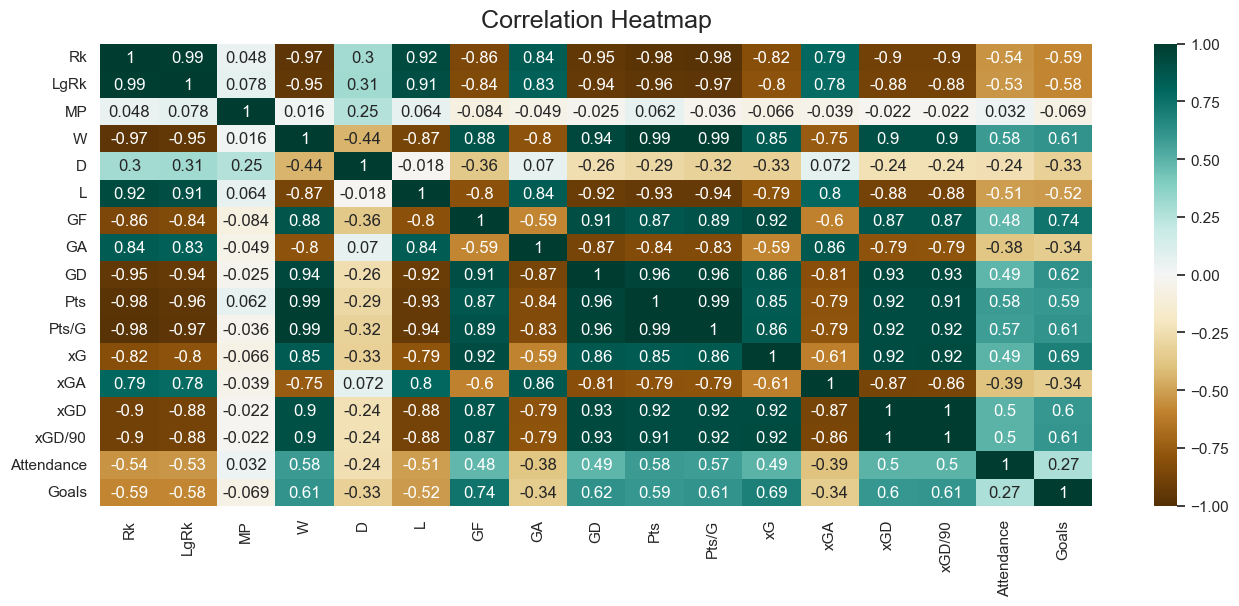

In [296]:
#Veisualizop la correlación entre variables
# =======================================================================

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(liga.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.show()#('heatmap.png', dpi=300, bbox_inches='tight')

<div class="alert alert-info" role="alert">
  <strong>Exercici 1.</strong> Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.
</div>

#### La hipótesis consiste en determinar si la media de partidos ganados en un Country en concreto corresponde o no con un valor específico (en este caso será la media de partidos ganados por el resto de Cuntry de la UEFA)

In [297]:
#Media partidos ganados por country UEFA to get un valore especifico para la comparación. 
# ====================================================================================

mean= round(liga.loc[liga['Country'] != 'ENG', 'W'].mean(),2)
mean

13.32

#### Hipótesis nula (H0).

- H0: x̅ = 20 (la media de partidos ganados por country "ENG" es igual a la media de partitos del resto de contry UEFA (13.32))

#### Hipótesis alternativa (H1).
- H1: x̅ > 20 (la media Inglesa es superior al 13.32)

- Alpha is set to 0.05.

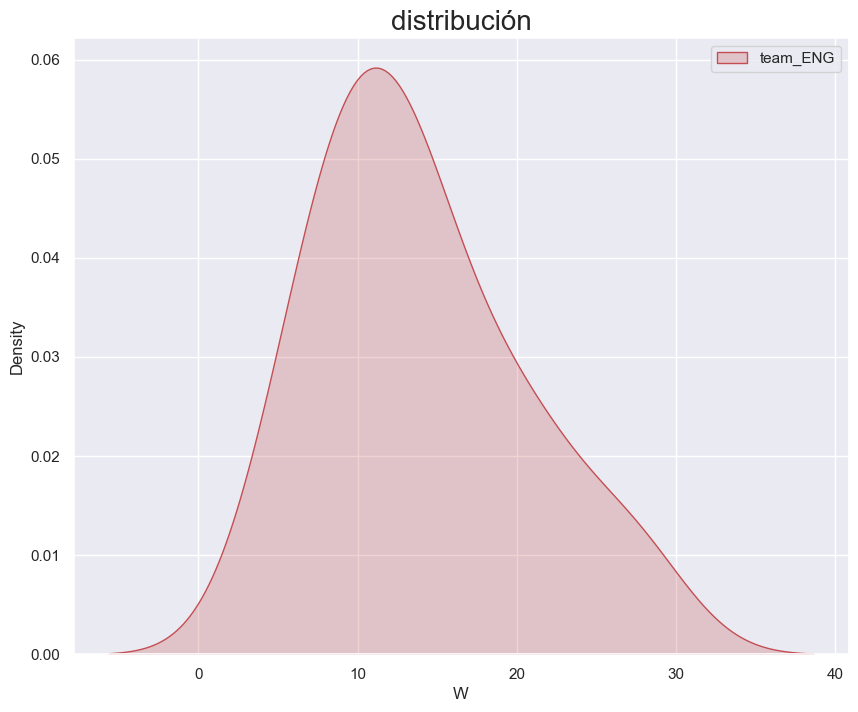

In [298]:
#Visualización distribución de los datos.
# ==========================================

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,8)})
sns.kdeplot(liga.loc[liga['Country'] == 'ENG', 'W'], color='r', label='team_ENG', shade = True)
plt.title('distribución', fontsize=20)
plt.legend()
plt.show()

In [299]:
sample = liga.loc[liga['Country'] == 'ENG', 'W'].tolist()
 
p_value= round(stats.ttest_1samp(a=sample, popmean=mean, alternative='greater')[1],3)

print(f"El p-values es: {p_value}")

if p_value<0.05:
    print("Rechazamos el hipotesis")
else:
    print("No rechazamos el hipotesis")
    

El p-values es: 0.334
No rechazamos el hipotesis


<div class="alert alert-info" role="alert">
  <strong>Exercici 2.</strong> Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.
</div>

#### El hipótesis consiste en determinar si las medias de goles de dos grupos distintos son o no iguales

#### Hipótesis nula (H0).

- H0: µ1 = µ2 (media goles marcados por los 'Top Team Scorer' ITA = media goles marcados por 'Top Team Scorer' ESP)

#### Hipótesis alternativa (H1).
- H1: x̅ > 20 (media goles marcados por los 'Top Team Scorer' ITA > media goles marcados por 'Top Team Scorer' ESP)

- Alpha is set to 0.05.

In [300]:
#Extraigo los datos para el examen
# =================================

best_ITA = liga.loc[liga['Country'] == 'ITA', 'Goals'].tolist()

best_ESP = liga.loc[liga['Country'] == 'ESP', 'Goals'].tolist()


In [301]:
print(len(best_ITA))

print(len(best_ESP))

20
20


In [302]:
#Calculo la media para tener una idea
# =====================================

print('team_ITA:', np.mean(best_ITA))

print('team_ESP:', np.mean(best_ESP))

team_ITA: 13.35
team_ESP: 11.7


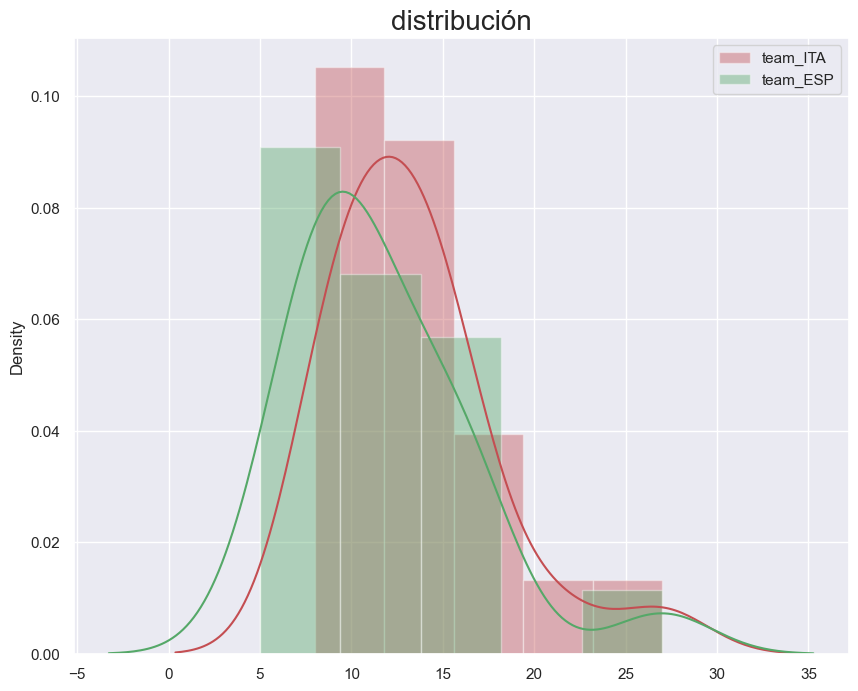

In [303]:
#Visualización distribución de los datos.
# ==========================================

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(best_ITA, color='r', kde=True, norm_hist=True, label='team_ITA')
sns.distplot(best_ESP, color='g', kde=True, norm_hist=True, label='team_ESP')
plt.title('distribución', fontsize=20)
plt.legend()
plt.show()

In [304]:
#Planteo el null hypothesis de una distribución normal de las muestras con el test de Shapiro-Wilk.
#(p_value>0.05)= distribución normal
# ===================================================================================================

test_ITA = stats.shapiro(best_ITA)[1]
test_ESP = stats.shapiro(best_ESP)[1]

print(f'resultado ITA: {test_ITA}\nresultado ESP: {test_ESP}')

if test_ITA < 0.05 and test_ESP < 0.05:
    print("Rechazamos el hipotesis")
else:
    print("No rechazamos el hipotesis")
    

resultado ITA: 0.018091589212417603
resultado ESP: 0.017622308805584908
Rechazamos el hipotesis


In [305]:
#Como al parecer no tenemos una distribución normal, para comprobar la hipotesis inicial se podria aplicar el u-test.
#Este test necesita que la varianza sea igual en los dos grupos.
#Por ello, se analizar la homocedasticidad con el test de Levene que es menos sensible a la falta de normalidad.
# =========================================================================================================

muestra=liga[['Country', 'Goals']].query("Country == 'ITA'or Country == 'ESP'").sort_values(by=['Country', 'Goals'], ascending=[False, False])

In [306]:
pg.homoscedasticity(data=muestra, dv='Goals', group='Country', method='levene')

,W,pval,equal_var
levene,0.104478,0.748293,True


- No hay evidencias en contra de la igualdad de varianzas.

In [307]:
#Se procede a realizar la prueba Mann-Whitney.
# ========================================================

stat, p_value = mannwhitneyu(best_ITA, best_ESP)
print('stat=%.3f, p_value=%.3f' % (stat, p_value))
if p_value<0.05:
    print("Rechazamos el hipotesis")
else:
    print("No rechazamos el hipotesis")

stat=250.000, p_value=0.179
No rechazamos el hipotesis


<div class="alert alert-info" role="alert">
  <strong>Exercici 3.</strong> Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%..
</div>

#### El hipótesis consiste en determinar si las medianas de los datos selecciónados son iguales.

#### Hipótesis nula (H0).

- H0: µ1 = µ2 = µ3 (Las medianas de las variables 'GF', 'GA', 'Pts' son iguales.)

#### Hipótesis alternativa (H1).
- H1: µ1 ≠ µ2 or µ1 ≠ µ3 or µ2 ≠ µ3 (Al menos una de las medianas de las variables difiere de las demás.)

- Alpha is set to 0.05.

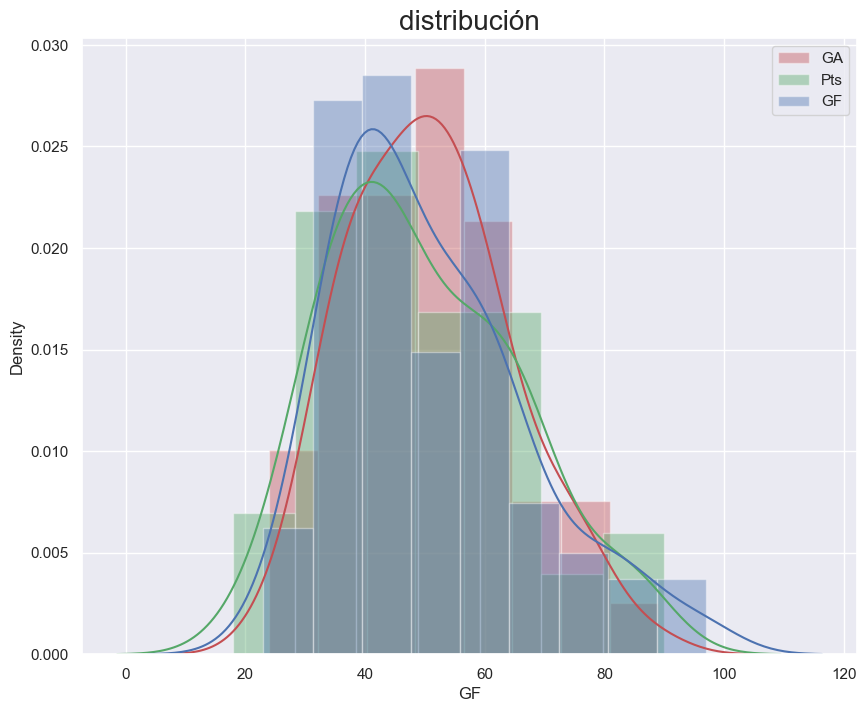

In [308]:
#Visualización distribución de los datos.
# ==========================================

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(liga['GA'], color='r', kde=True, norm_hist=True, label='GA')
sns.distplot(liga['Pts'], color='g', kde=True, norm_hist=True, label='Pts')
sns.distplot(liga['GF'], color='b', kde=True, norm_hist=True, label='GF')

plt.title('distribución', fontsize=20)
plt.legend()
plt.show()

#### Planteo el null hypothesis de una distribución normal de las muestras.

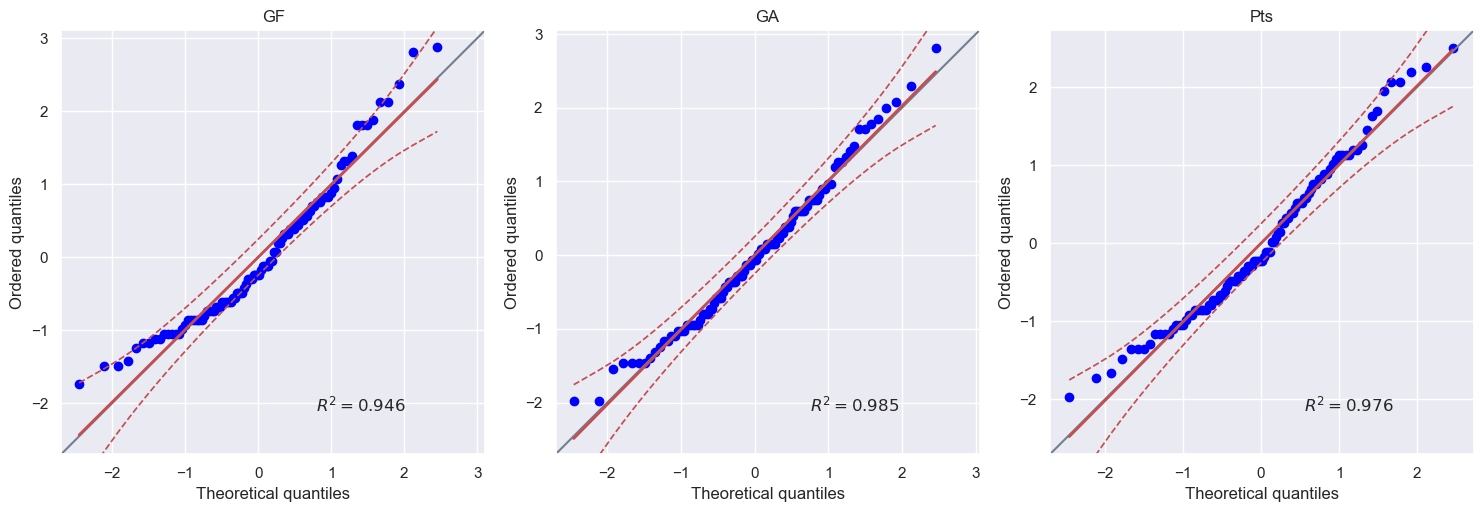

In [309]:
# Con un QQ-plot (Quantile-Quantile plot) comprobamos dos conjuntos la distribución de forma visual.
# ==============================================================================
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
pg.qqplot(liga['GF'], dist='norm', ax=axs[0])
axs[0].set_title('GF')
pg.qqplot(liga['GA'], dist='norm', ax=axs[1])
axs[1].set_title('GA')
pg.qqplot(liga['Pts'], dist='norm', ax=axs[2])
axs[2].set_title('Pts')

plt.tight_layout()

#### Parece que los datos no sigan una distribución totalmente similar.

In [310]:
#El test de Shapiro-Wilk se desaconseja cuando se dispone de muchos datos (más de 50) por su elevada sensibilidad a pequeñas desviaciones. 
#Por lo tanto, usamos el D'Agostino's K-squared test .
#(p_value>0.05)= distribución normal
# ===================================================================================================

k2, p_value = stats.normaltest(liga.GA)
print(f"Variable GA: Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(liga.GF)
print(f"Variable GF: Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(liga.Pts)
print(f"Variable Pts: Estadítico = {k2}, p-value = {p_value}")

Variable GA: Estadítico = 2.7280238097735, p-value = 0.2556331410952685
Variable GF: Estadítico = 10.676026344757469, p-value = 0.004805408750775189
Variable Pts: Estadítico = 4.329785637662774, p-value = 0.11476223428850298


#### La hipotesis se rechaza ya que existe una muestras con p-value inferior a 0.05.

In [313]:
#Para comprobar el hipotesis inicial, al tener muestras cuya distribución no normal, utilizamos el test de Friedman para muestras relacionadas o repetidas.
# ===================================================================================================

stat, p = friedmanchisquare(liga['GF'], liga['GA'], liga['Pts'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Misma distribución (no se rechaza H0)')
else:
    print('Diferente distribución (se rechaza H0)')

Statistics=0.484, p=0.785
Misma distribución (no se rechaza H0)
